In [1]:
from __future__ import print_function, division
from builtins import range

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
N = 100
D = 2

N_per_class = N//2


X = np.random.randn(N,D)

In [4]:
# center the first 50 points at (-2,-2)
X[:N_per_class,:] = X[:N_per_class,:] - 2*np.ones((N_per_class,D))

# center the last 50 points at (2, 2)
X[N_per_class:,:] = X[N_per_class:,:] + 2*np.ones((N_per_class,D))

# labels: first N_per_class are 0, last N_per_class are 1
T = np.array([0]*N_per_class + [1]*N_per_class)

In [9]:
ones = np.ones((N, 1))
Xb = np.concatenate((ones, X), axis=1)
Xb.shape

(100, 3)

In [6]:
# randomly initialize the weights
w = np.random.randn(D + 1)

# calculate the model output
z = Xb.dot(w)

In [7]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))


Y = sigmoid(z)

In [8]:
Y

array([0.19986264, 0.01466494, 0.02243806, 0.17169344, 0.02878246,
       0.56026925, 0.02555837, 0.04816325, 0.13108552, 0.13228684,
       0.02907388, 0.06458564, 0.05342666, 0.2004559 , 0.09692951,
       0.03697502, 0.31113768, 0.12279073, 0.12956663, 0.19747155,
       0.09686029, 0.07358954, 0.05519872, 0.04275713, 0.08857767,
       0.08016758, 0.04374457, 0.08884786, 0.08061072, 0.06216873,
       0.19463228, 0.07631153, 0.10861772, 0.30520841, 0.06580548,
       0.0172835 , 0.0730741 , 0.06067123, 0.00253463, 0.03845631,
       0.54932522, 0.18901762, 0.03468397, 0.00989757, 0.33070212,
       0.10536651, 0.03344796, 0.06923682, 0.02676635, 0.2199454 ,
       0.116663  , 0.92114812, 0.81160941, 0.26792235, 0.68405904,
       0.78059895, 0.56476345, 0.4023627 , 0.47643886, 0.31760335,
       0.18462815, 0.42056847, 0.23078222, 0.93227674, 0.89136549,
       0.39241565, 0.97015513, 0.86467661, 0.51199004, 0.40542274,
       0.40891724, 0.44444777, 0.82516786, 0.59169501, 0.98184

In [11]:
T

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [10]:
# calculate the cross-entropy error
def cross_entropy(T, Y):
    E = 0
    for i in range(len(T)):
        if T[i] == 1:
            E -= np.log(Y[i])
        else:
            E -= np.log(1 - Y[i])
    return E

In [13]:
learning_rate = 0.1
for i in range(10):
    if i % 1 == 0:
        print(cross_entropy(T, Y))

    # gradient descent weight udpate
    w += learning_rate * Xb.T.dot(T - Y)
    print("weight for", i, "iteration is", w)

    # recalculate Y
    Y = sigmoid(Xb.dot(w))
    print(Y.shape)
    print("____________")

1.18449741994076
weight for 0 iteration is [1.19695117 4.90536621 4.856356  ]
(100,)
____________
1.1120310062604726
weight for 1 iteration is [1.26377397 4.86055112 4.87641137]
(100,)
____________
1.0444861089172024
weight for 2 iteration is [1.32822466 4.81734673 4.89579375]
(100,)
____________
0.9816902614540176
weight for 3 iteration is [1.39031682 4.77574767 4.9145082 ]
(100,)
____________
0.9234400902338126
weight for 4 iteration is [1.45007913 4.73573841 4.9325641 ]
(100,)
____________
0.8695089811845138
weight for 5 iteration is [1.50755356 4.69729448 4.94997464]
(100,)
____________
0.8196545686823292
weight for 6 iteration is [1.56279329 4.66038387 4.96675624]
(100,)
____________
0.773625653583338
weight for 7 iteration is [1.61586062 4.62496842 4.98292786]
(100,)
____________
0.7311682821944305
weight for 8 iteration is [1.66682488 4.59100524 4.99851048]
(100,)
____________
0.6920308397999164
weight for 9 iteration is [1.71576055 4.55844796 5.01352648]
(100,)
____________


In [14]:
print("Final w:", w)

Final w: [1.71576055 4.55844796 5.01352648]


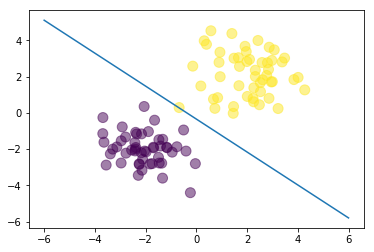

In [15]:
# plot the data and separating line
plt.scatter(X[:,0], X[:,1], c=T, s=100, alpha=0.5)
x_axis = np.linspace(-6, 6, 100)
y_axis = -(w[0] + x_axis*w[1]) / w[2]
plt.plot(x_axis, y_axis)
plt.show()